In [110]:
import pandas as pd 
import matplotlib.pylab as plt

In [111]:
df = pd.read_csv('./Data/mobileTrendDataset.csv', sep='\t', engine="python")

In [112]:
# 모바일 시장 현황 조사

In [113]:
# - yearID: 연도 구분 (Y1 다음년도가 Y2)
# - weekIndex: 주차 1~52주
# - rank: 해당 주차의 앱 순위
# - appID: 앱 구분자
# - uniqueInstall: 앱 설치자 수(중복 불포함)
# - UU: 주간 이용자 수
# - useRate: 설치자중 이용자 비율
# - totalDuration: 총 이용시간(분)
# - avgDuration: 이용자당 평균 이용시간(분)
# - dayCounts: 이용자의 평균 접속일수

In [114]:
df["score"] = 101 - df["rank"]
# 일등 한번 하면 100점 

In [115]:
df_1 = df.copy()

In [116]:
rank_df = df.groupby(["appID","genreID"]).sum(1).reset_index()

In [117]:
# 총 1206개의 어플 중에서 상위 백등의 장르 분포 
top100_rank = rank_df.sort_values(by="score", ascending=False)[:100]

In [118]:
(df["genreID"].unique()) 

array(['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10'], dtype=object)

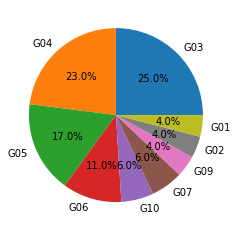

특이한점 장르는 G01 ~ G10까지 존재하는데, rank score 기준으로 top100등 안에는 G08이 존재 하지 않는다


In [119]:
val = top100_rank.value_counts("genreID").values
keys = top100_rank.value_counts("genreID").keys()
plt.pie(val, labels=keys, autopct='%.1f%%')
plt.show()

print(f"특이한점 장르는 G01 ~ G10까지 존재하는데, rank score 기준으로 top100등 안에는 G08이 존재 하지 않는다")

In [120]:
# G08 너는 누구?

<BarContainer object of 10 artists>

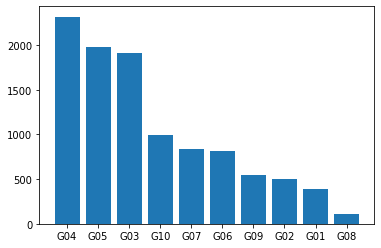

In [121]:
# 장르 분포 확인
keys = df.value_counts("genreID").keys()
values = df.value_counts("genreID").values

plt.bar(keys, values)

In [122]:
# 데이터 분포에서도 가장 적네...
# 그럼  어플 갯수는, 다운로드 수는?, 주간이용자 수는? ,설치자 중 이용자 비율?, 총 이용시간(분)?, 이용자당 평균 이용시간(분)?은

In [123]:
# G08 frame 만들어보자 
G08_df = df[df["genreID"] == "G08"]
G08_df.head(3)

,yearID,weekIndex,rank,appID,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts,genreID,score
29,Y1,1,30,N0030,1249795,305580,24.45,5283478,17.29,1.69,G08,71
131,Y1,2,32,N0030,1148375,276182,24.05,2353071,8.52,1.49,G08,69
222,Y1,3,23,N0030,1066954,428392,40.15,3487111,8.14,1.76,G08,78


In [124]:
uni = G08_df["appID"].unique()

print(f"어플 이름은 {uni} 입니다 ")
print("top100에 들어갔었던 G08 장르의 어플 갯수는 {} 입니다".format(len(uni)),sep= "\n")

어플 이름은 ['N0030' 'N0207' 'N0459' 'N0674' 'N0756' 'N0765' 'N0854' 'N1002' 'N1018'
 'N1025' 'N1118' 'N1158'] 입니다 
top100에 들어갔었던 G08 장르의 어플 갯수는 12 입니다


In [125]:
# top100에 한번이라도 들어갔었던 어플의 총 갯수~~
len(df["appID"].unique())

# 인기가 매주 기준에서도 없었네... 어떤 장르인지 너무 궁금하다...

1206

In [126]:
G08_df.groupby("appID").sum()

,weekIndex,rank,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts,score
appID,,,,,,,,,
N0030,197,965,14056253,3818042,478.08,32661044,145.95,26.73,853
N0207,17,151,284111,243466,169.97,4441537,37.83,2.51,51
N0459,466,615,7376777,4306029,732.52,303176855,831.69,46.39,698
N0674,49,86,148248,123499,83.31,2258797,18.29,1.13,15
N0756,301,1422,3121450,2517525,1533.76,843523686,6276.37,94.59,497
N0765,13,71,747600,615234,160.62,17197538,56.44,3.77,131
N0854,834,2150,7066292,4573873,1861.77,485407119,3027.01,85.81,779
N1002,414,351,10977984,6314839,638.31,357505334,579.09,26.00,861
N1018,61,127,451410,351361,154.84,17369773,107.31,3.53,75


In [127]:
df.describe().mean().astype(int)

weekIndex             1321
rank                  1341
uniqueInstall      3486798
UU                 1064384
useRate               1348
totalDuration    255237254
avgDuration           1552
dayCounts             1302
score                 1341
dtype: int64

In [128]:
G08_compare = G08_df.groupby("appID").sum() - df.describe().mean().astype(int).T

In [129]:
G08_compare = G08_compare[["uniqueInstall", "UU", "useRate", "totalDuration", "avgDuration", "dayCounts"]]

In [130]:
from sklearn.preprocessing import MinMaxScaler
min1 = MinMaxScaler()
output = min1.fit_transform(G08_compare)
output = pd.DataFrame(output, columns=G08_compare.columns, index=list(G08_compare.index.values))
output = output.reset_index().rename(columns={"index":"appID"})

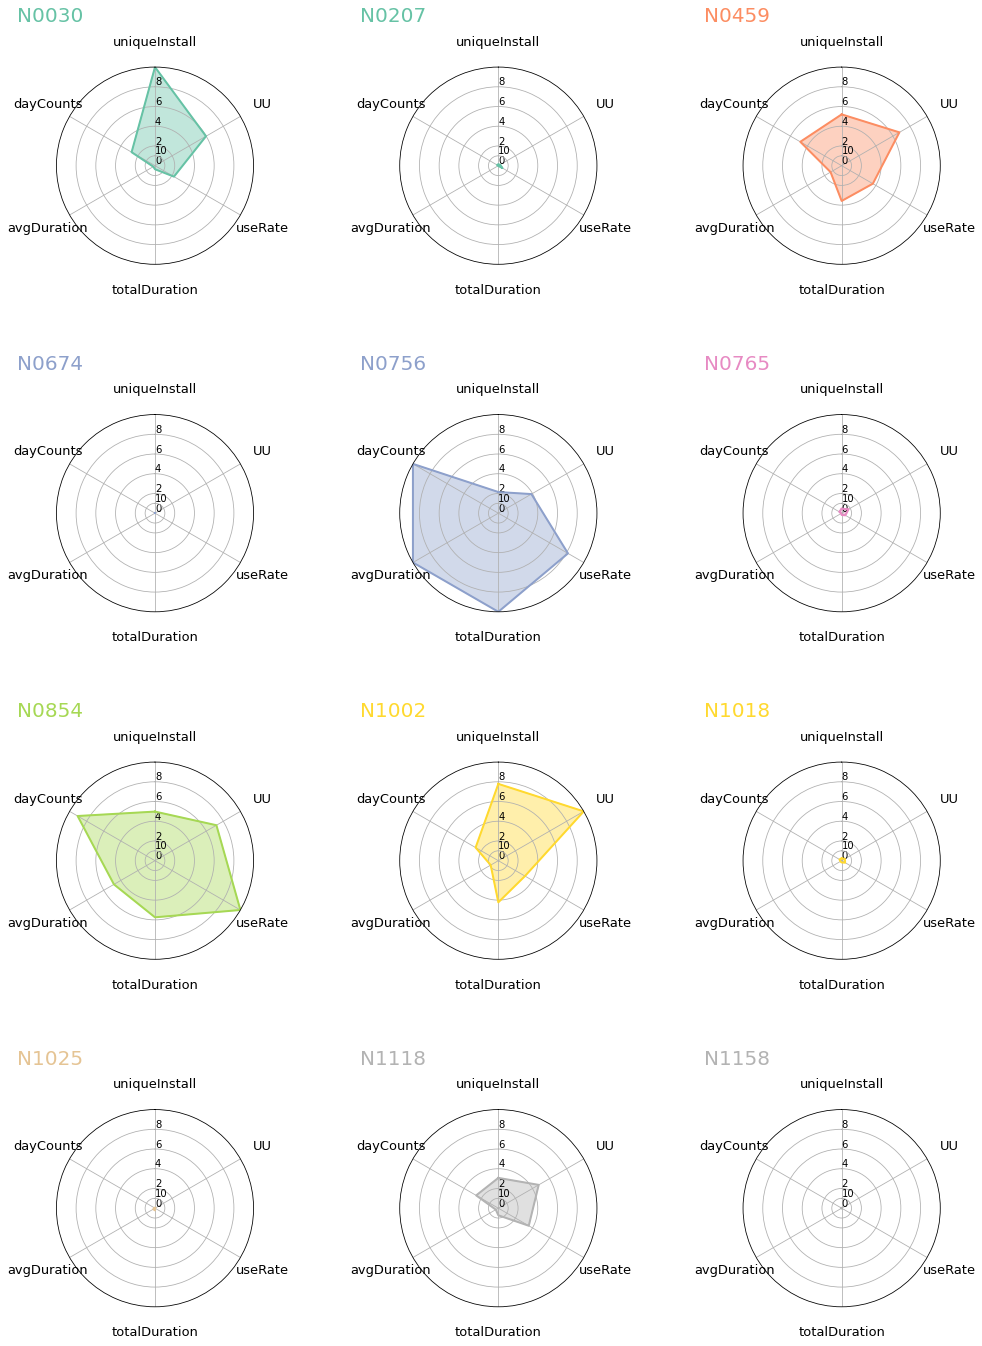

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = output
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('appID').tolist()
    data += data[:1]
    ax = plt.subplot(4,3,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,0.10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.appID, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [132]:
# 장르별로 평균 값으로 만들었을때 상황은 우짤까?

In [133]:
total_genre = df_1.groupby("genreID").mean()

In [134]:
from sklearn.preprocessing import MinMaxScaler
min1 = MinMaxScaler()
output = min1.fit_transform(total_genre)
output = pd.DataFrame(output, columns=total_genre.columns, index=list(total_genre.index.values))
output = output.reset_index().rename(columns={"index":"appID"})

In [135]:
output.reset_index(inplace=True, drop=True)

In [136]:
del output["weekIndex"]
del output["rank"]

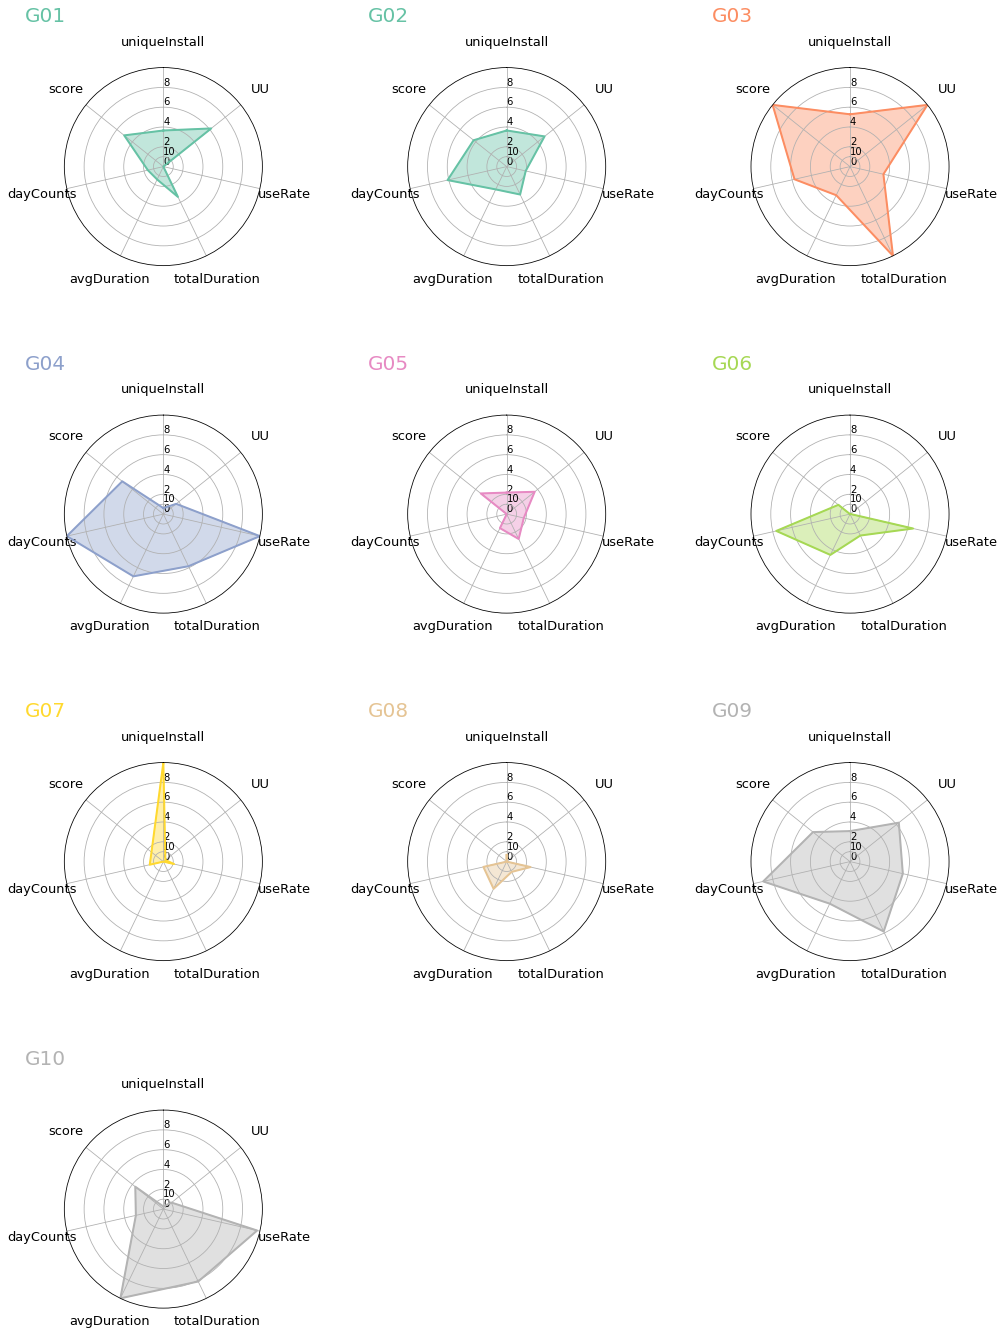

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = output
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('appID').tolist()
    data += data[:1]
    ax = plt.subplot(4,3,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,0.10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.appID, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [138]:
# 어플로 봤을때 

In [146]:
df_1 = df_1.groupby("appID").sum().sort_values("score", ascending=False)

In [151]:
del df_1["rank"]

In [150]:
del df_1["weekIndex"]
del df_1["rank"]

KeyError: 'weekIndex'

In [154]:
df_2 = df_1[:10]

In [165]:
from sklearn.preprocessing import MinMaxScaler
min1 = MinMaxScaler()
output = min1.fit_transform(df_2)
output = pd.DataFrame(output, columns=df_2.columns, index=list(df_2.index.values))
output = output.reset_index().rename(columns={"index":"appID"})

In [168]:
output = output.reset_index(drop=True)

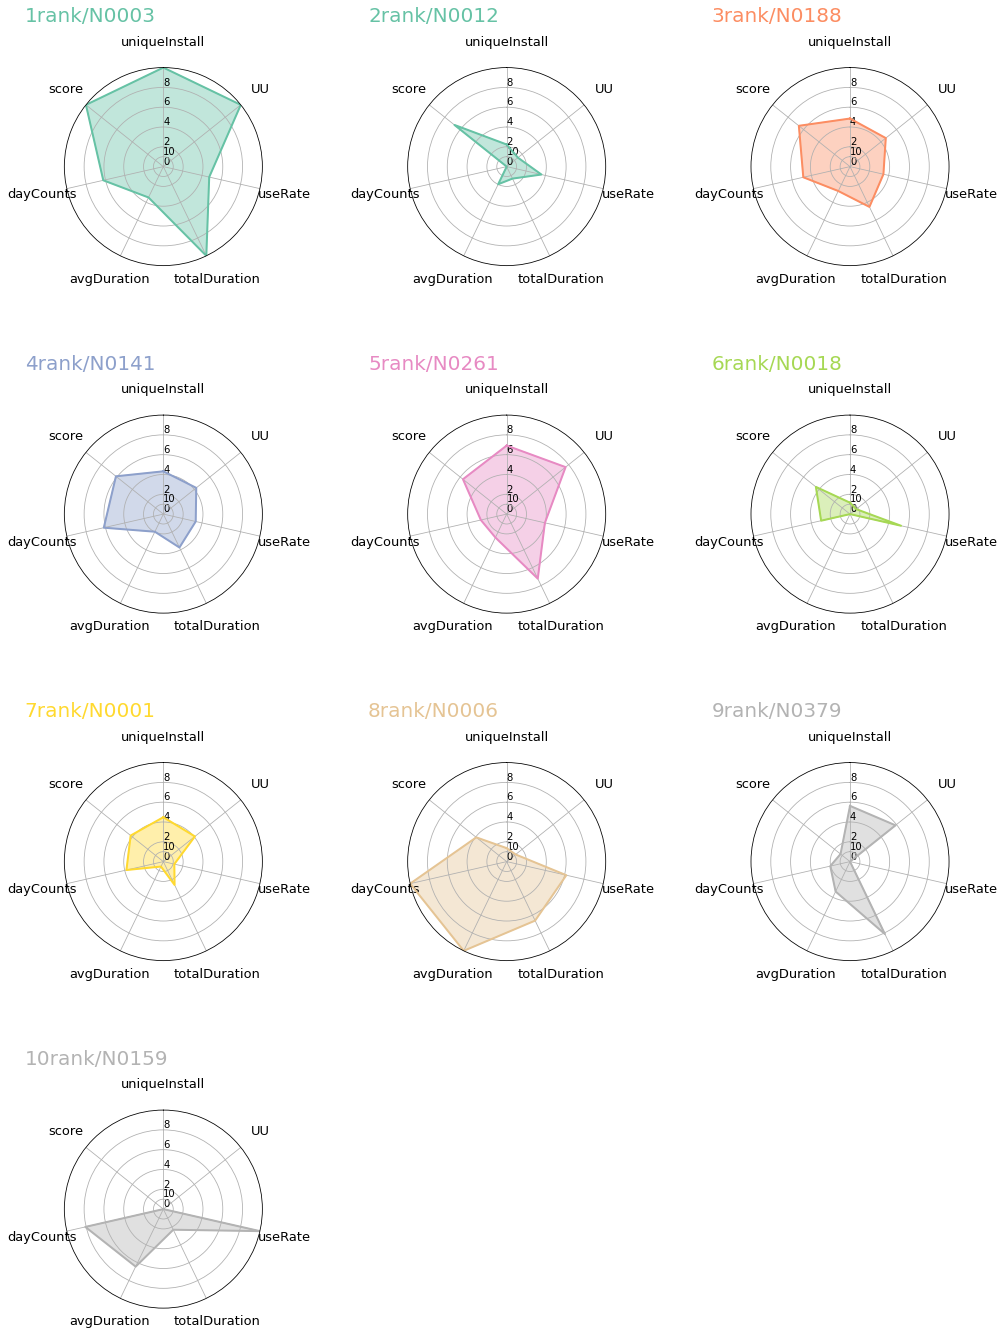

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = output
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('appID').tolist()
    data += data[:1]
    ax = plt.subplot(4,3,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1)
    ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,0.10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(str(i +1) + "rank" + "/" +row.appID , size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [ ]:
# 평가 기준에 로열티를 넣어서 해보기 (지속시간, 실제 가동율)

In [ ]:
# 전채기간 top100

# top100 리스트 왔다 같다 하는거 차트로 그리면 이쁘겠다

In [144]:
# top100 이랑 장르 같이 분석해서, 트랜드 파악?

In [145]:
# 로열티 올리는 방벙에 대해서 또 생각해보기ㅡ